## TUGAS
- Download file “100 Sales record.csv”
- Lakukan extraction, transform dan load sehingga di mysql akan terbentuk 2 tabel yaitu tabel `region` berisi `country` dan `Region` & Tabel `Sales` berisi semua kolom yang ada selain kolom region
- Jika sudah berhasil, buatlah script untuk melakukan query dari tabel bentukan tersebut dan menampilkan data total profit tiap Region.

## Langkah - langkah:

### 1. Download file “100 Sales record.csv”
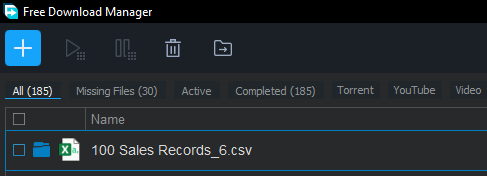

### 2. Masuk ke Database MySQL (menggunakan phpMyAdmin), kemudian buatlah database baru bernama `tugasbigdata6`
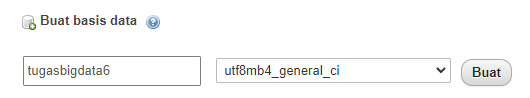

### 3. Kita lakukan extraction, transform dan load untuk membentuk tabel region di database tugasbigdata6

In [9]:
import sqlalchemy as sql
import pandas as pd

conn_string = "mysql+pymysql://root:@localhost/tugasbigdata6"

sql_engine = sql.create_engine(conn_string)

#extract dan transform
df_csv = pd.read_csv("100 Sales Records.csv")
df_csv_filter = df_csv[['Region','Country']]

#load data ke MySQL
df_csv_filter.to_sql("region", con=sql_engine, if_exists='replace', index=False)

Pada kode tersebut kita menghubungkan kode kita dengan database tugasbigdata6 yang sudah saya buat tadi di PhpMyAdmin dengan `conn_string = "mysql+pymysql://root:@localhost/tugasbigdata6"` dan `sql_engine = sql.create_engine(conn_string)`. Setelah terhubung, kita ekstrak dan baca file 100 Sales Records.csv kemudian kita transform dengan hanya mengambil data di kolom Region dan Country dengan filter. Terakhir kita load data ke MySQL.

Tampilan di database PhpMyAdmin jika berhasil:
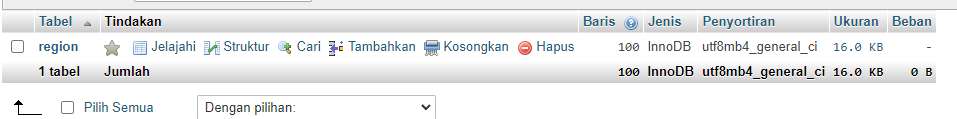
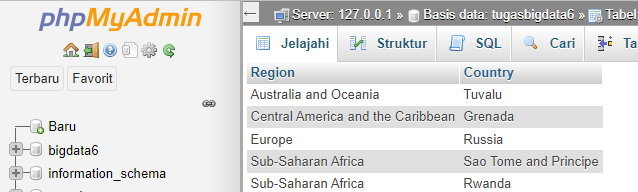
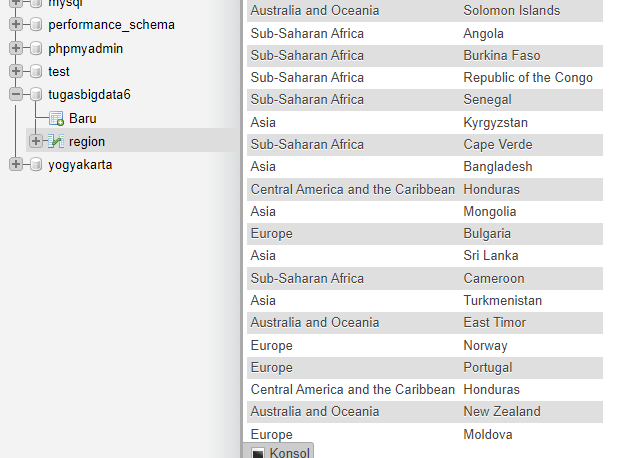

### 4. Kita lakukan extraction, transform dan load untuk membentuk tabel sales di database tugasbigdata6

In [10]:
import sqlalchemy as sql
import pandas as pd

conn_string = "mysql+pymysql://root:@localhost/tugasbigdata6"

#extract dan transform
df_csv = pd.read_csv("100 Sales Records.csv")
df_csv_filter = df_csv[['Country','Item_Type','Sales_Channel','Order_Priority','Order_Date','Order_ID','Ship_Date','Units_Sold','Unit_Price','Unit_Cost','Total_Revenue','Total_Cost','Total_Profit']]

#load data ke MySQL
df_csv_filter.to_sql("sales", con=sql_engine, if_exists='replace', index=False)

Pada kode tersebut kita koneksikan kode kita dengan database tugasbigdata6 di PhpMyAdmin dengan `conn_string = "mysql+pymysql://root:@localhost/tugasbigdata6"` dan `sql_engine = sql.create_engine(conn_string)`. Setelah terhubung, kita ekstrak dan baca file 100 Sales Records.csv kemudian kita transform dengan mengambil data di kolom selain Region dengan filter. Terakhir kita load data ke MySQL.

Tampilan di database PhpMyAdmin jika berhasil:
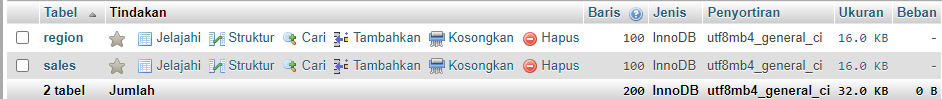
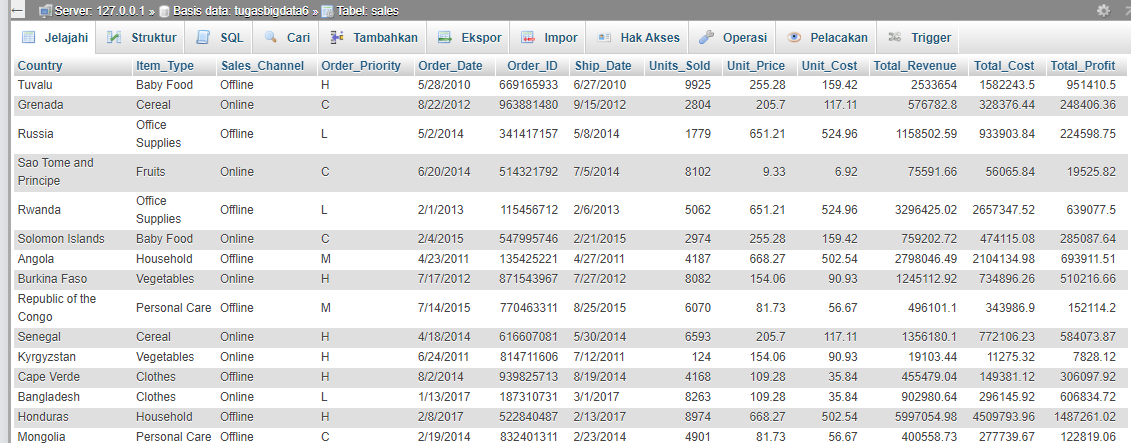
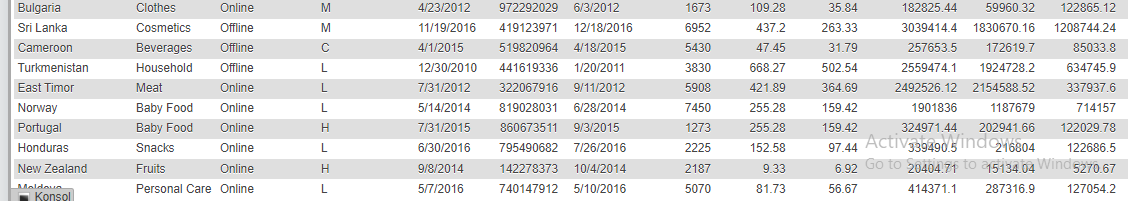

### 5. Membuat script untuk melakukan query dari tabel bentukan tersebut dan menampilkan data total profit tiap Region.

In [16]:
import pymysql
import pandas as pd

dbcon = pymysql.connect(host='localhost',
                        user='root',
                        password='',
                        database='tugasbigdata6')

try:
    SQL_Query = pd.read_sql_query(
        '''select Region, Total_Profit from region, sales''', dbcon)

    df = pd.DataFrame(SQL_Query, columns=['Region', 'Total_Profit'])
    print(df)
    print('The data type of df is: ', type(df))
except:
    print("Error: unable to convert the data")

                                 Region  Total_Profit
0                 Australia and Oceania     951410.50
1     Central America and the Caribbean     951410.50
2                                Europe     951410.50
3                    Sub-Saharan Africa     951410.50
4                    Sub-Saharan Africa     951410.50
...                                 ...           ...
9995                 Sub-Saharan Africa     889472.91
9996                               Asia     889472.91
9997                 Sub-Saharan Africa     889472.91
9998                      North America     889472.91
9999                 Sub-Saharan Africa     889472.91

[10000 rows x 2 columns]
The data type of df is:  <class 'pandas.core.frame.DataFrame'>


Kode di atas pada dasarnya bertujuan untuk mengonversi data yang ada di MySQL ke dalam suatu dataframe menggunakan pandas. Berikut tahap-tahapnya:
1. Import Pandas dan pymysql.
2. Koneksikan Python ke MySQL dengan `connect()`. Fungsi `pymysql.connect()` membutuhkan 4 parameter yaitu hostname, username, password, dan database.
3. Baca kueri MySQL dan pilih data yang akan diproses dengan kueri `select` dan `from`. Kita tuliskan kode `'''select Region, Total_Profit from region, sales''', dbcon)`.
4. Konversikan variabel ke dalam DataFrame menggunakan `pd.DataFrame()`. DataFrame membutuhkan dua parameter yaitu data kueri MySQL dan kolom yang ada di tabel yang telah kita select. Konversi tersebut bisa kita lakukan dengan menuliskan baris kode `df = pd.DataFrame(SQL_Query, columns=['Region', 'Total_Profit'])`.
5. Kita tampilkan tipe data pada DataFrame dengan `print('The data type of df is: ', type(df))`.
6. Terakhir kita buat exception jika gagal memproses konversi yaitu dengan except